In [1]:
import pandas as pd
import numpy as np
import warnings
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import plotly.express as px
import plotly.offline as off
pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt
from pdpbox import pdp
# this line helps render plotly charts inside jupyter notebooks if they're not running
off.init_notebook_mode()
# this is to silent warning messages
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\elena\data-course\Homework\Unit2\data\iowa_mini.csv")

In [3]:
df.head()

Id  MSSubClass MSZoning  LotArea Neighborhood  OverallQual  OverallCond  \
0   1          60       RL     8450      CollgCr            7            5   
1   2          20       RL     9600      Veenker            6            8   
2   3          60       RL    11250      CollgCr            7            5   
3   4          70       RL     9550      Crawfor            7            5   
4   5          60       RL    14260      NoRidge            8            5   

   YearBuilt  GrLivArea  1stFlrSF  2ndFlrSF  GrLivArea.1  FullBath  HalfBath  \
0       2003       1710       856       854         1710         2         1   
1       1976       1262      1262         0         1262         2         0   
2       2001       1786       920       866         1786         2         1   
3       1915       1717       961       756         1717         1         0   
4       2000       2198      1145      1053         2198         2         1   

  GarageType  GarageYrBlt GarageFinish  GarageCars  SalePrice  
0     Attchd       2003.0          RFn           2     208500  
1     Attchd       1976.0          RFn           2     181500  
2     Attchd       2001.0          RFn           2     223500  
3     Detchd       1998.0          Unf           3     140000  
4     Attchd       2000.0          RFn           3     250000

In [4]:
df.corr(method='spearman')[['SalePrice']].sort_values(by = 'SalePrice')

SalePrice
OverallCond  -0.129325
Id           -0.018546
MSSubClass    0.007192
2ndFlrSF      0.293598
HalfBath      0.343008
LotArea       0.456461
1stFlrSF      0.575408
GarageYrBlt   0.593788
FullBath      0.635957
YearBuilt     0.652682
GarageCars    0.690711
GrLivArea     0.731310
GrLivArea.1   0.731310
OverallQual   0.809829
SalePrice     1.000000

In [5]:
df.corr(method = 'spearman')

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id           1.000000    0.019226 -0.005364    -0.028771     0.003622   
MSSubClass   0.019226    1.000000 -0.269570     0.108065    -0.071770   
LotArea     -0.005364   -0.269570  1.000000     0.233303    -0.046912   
OverallQual -0.028771    0.108065  0.233303     1.000000    -0.177521   
OverallCond  0.003622   -0.071770 -0.046912    -0.177521     1.000000   
YearBuilt   -0.005130    0.035848  0.103385     0.647392    -0.416964   
GrLivArea    0.002812    0.203576  0.449040     0.603262    -0.153720   
1stFlrSF    -0.000616   -0.278318  0.443858     0.408730    -0.166686   
2ndFlrSF     0.009455    0.487749  0.119356     0.289561     0.001111   
GrLivArea.1  0.002812    0.203576  0.449040     0.603262    -0.153720   
FullBath     0.007269    0.194912  0.235377     0.576372    -0.262400   
HalfBath     0.002564    0.282632  0.142658     0.298455    -0.071342   
GarageYrBlt -0.000194    0.079268  0.041796     0.618193    -0.379398   
GarageCars   0.013301    0.024226  0.340195     0.608756    -0.254763   
SalePrice   -0.018546    0.007192  0.456461     0.809829    -0.129325   

             YearBuilt  GrLivArea  1stFlrSF  2ndFlrSF  GrLivArea.1  FullBath  \
Id           -0.005130   0.002812 -0.000616  0.009455     0.002812  0.007269   
MSSubClass    0.035848   0.203576 -0.278318  0.487749     0.203576  0.194912   
LotArea       0.103385   0.449040  0.443858  0.119356     0.449040  0.235377   
OverallQual   0.647392   0.603262  0.408730  0.289561     0.603262  0.576372   
OverallCond  -0.416964  -0.153720 -0.166686  0.001111    -0.153720 -0.262400   
YearBuilt     1.000000   0.288493  0.293363  0.029716     0.288493  0.537420   
GrLivArea     0.288493   1.000000  0.494421  0.642857     1.000000  0.658419   
1stFlrSF      0.293363   0.494421  1.000000 -0.276218     0.494421  0.366891   
2ndFlrSF      0.029716   0.642857 -0.276218  1.000000     0.642857  0.384187   
GrLivArea.1   0.288493   1.000000  0.494421  0.642857     1.000000  0.658419   
FullBath      0.537420   0.658419  0.366891  0.384187     0.658419  1.000000   
HalfBath      0.244901   0.437128 -0.149706  0.625272     0.437128  0.155230   
GarageYrBlt   0.890546   0.281306  0.230299  0.073097     0.281306  0.538796   
GarageCars    0.601519   0.505094  0.450580  0.156499     0.505094  0.518310   
SalePrice     0.652682   0.731310  0.575408  0.293598     0.731310  0.635957   

             HalfBath  GarageYrBlt  GarageCars  SalePrice  
Id           0.002564    -0.000194    0.013301  -0.018546  
MSSubClass   0.282632     0.079268    0.024226   0.007192  
LotArea      0.142658     0.041796    0.340195   0.456461  
OverallQual  0.298455     0.618193    0.608756   0.809829  
OverallCond -0.071342    -0.379398   -0.254763  -0.129325  
YearBuilt    0.244901     0.890546    0.601519   0.652682  
GrLivArea    0.437128     0.281306    0.505094   0.731310  
1stFlrSF    -0.149706     0.230299    0.450580   0.575408  
2ndFlrSF     0.625272     0.073097    0.156499   0.293598  
GrLivArea.1  0.437128     0.281306    0.505094   0.731310  
FullBath     0.155230     0.538796    0.518310   0.635957  
HalfBath     1.000000     0.187364    0.229912   0.343008  
GarageYrBlt  0.187364     1.000000    0.630966   0.593788  
GarageCars   0.229912     0.630966    1.000000   0.690711  
SalePrice    0.343008     0.593788    0.690711   1.000000

In [6]:
df.groupby('Neighborhood')['SalePrice'].mean().plot(kind = 'bar', title = 'Average Sale Price by Area')

In [7]:
df.groupby('OverallQual')['SalePrice'].mean().plot(kind = 'bar', title = 'Average Sale Price by Quality')

In [8]:
df.groupby('YearBuilt')['SalePrice'].mean().plot(kind = 'line', title = 'Average Sale Price by Quality')

In [9]:
px.scatter(df, x = 'SalePrice', y = 'GrLivArea', trendline = 'ols', title = "Sale Price vs Living Area Size")

In [10]:
df.groupby('GarageCars')['SalePrice'].mean().plot(kind = 'bar', title = 'Average Sale Price by Number of Garages')

In [11]:
pd.options.display.min_rows = 50
df.isnull().sum().sort_values(ascending=False)

GarageFinish    81
GarageYrBlt     81
GarageType      81
Id               0
2ndFlrSF         0
GarageCars       0
HalfBath         0
FullBath         0
GrLivArea.1      0
1stFlrSF         0
MSSubClass       0
GrLivArea        0
YearBuilt        0
OverallCond      0
OverallQual      0
Neighborhood     0
LotArea          0
MSZoning         0
SalePrice        0
dtype: int64

In [12]:
df = df.fillna(0)

In [15]:
#random data split 80/20:
X = df.drop(['GrLivArea.1','SalePrice'], axis = 1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [16]:
X_test

Id  MSSubClass MSZoning  LotArea Neighborhood  OverallQual  \
892    893          20       RL     8414       Sawyer            6   
1105  1106          60       RL    12256      NoRidge            8   
413    414          30       RM     8960      OldTown            5   
522    523          50       RM     5000      BrkSide            6   
1036  1037          20       RL    12898       Timber            9   
614    615         180       RM     1491      MeadowV            4   
218    219          50       RL    15660      Crawfor            7   
1160  1161         160       RL     2280      NPkVill            6   
649    650         180       RM     1936      MeadowV            4   
887    888          50       RL    16466      Edwards            5   
576    577          50       RL     6292        SWISU            7   
1252  1253          20       RL     9858      Mitchel            5   
1061  1062          30  C (all)    18000       IDOTRR            3   
567    568          20       RL    10171      NridgHt            7   
1108  1109          60       RL     8063      Gilbert            6   
1113  1114          20       RL     8923        NAmes            5   
168    169          60       RL     8244      Gilbert            7   
1102  1103          20       RL     7000        NAmes            5   
1120  1121          30       RM     8263       IDOTRR            6   
67      68          20       RL    10665      CollgCr            7   
1040  1041          20       RL    13125       Sawyer            5   
453    454          60       FV     9000      Somerst            8   
670    671          60       RL     8633      CollgCr            6   
1094  1095          20       RL     5868        NAmes            5   
192    193          20       RL     9017      CollgCr            7   
...    ...         ...      ...      ...          ...          ...   
1368  1369         120       RM     4435      CollgCr            6   
1125  1126          20       RL    10434        NAmes            4   
111    112          80       RL     7750      Gilbert            7   
1243  1244          20       RL    13891      NridgHt           10   
744    745         120       RL     5395      StoneBr            8   
937    938          60       RL     9675      Somerst            7   
344    345         160       RM     2592      MeadowV            5   
1232  1233          90       RL     9842        NAmes            4   
865    866          20       RL     8750        NAmes            5   
1088  1089         160       RM     2522      Edwards            7   
350    351         120       RL     7820      NridgHt            9   
588    589          20       RL    25095      ClearCr            5   
1427  1428          50       RL    10930        NAmes            5   
948    949          60       RL    14006      CollgCr            7   
1449  1450         180       RM     1533      MeadowV            5   
989    990          60       FV     8125      Somerst            7   
677    678          30       RL     9022      OldTown            5   
478    479          20       RL    10637      CollgCr            8   
1271  1272          20       RL     9156       NWAmes            6   
1410  1411          60       RL    12420      CollgCr            7   
479    480          30       RM     5925      OldTown            4   
1361  1362          20       RL    16158      StoneBr            7   
802    803          60       RL     8199      CollgCr            7   
651    652          70       RL     9084      Edwards            4   
722    723          20       RL     8120        NAmes            4   

      OverallCond  YearBuilt  GrLivArea  1stFlrSF  2ndFlrSF  FullBath  \
892             8       1963       1068      1068         0         1   
1105            5       1994       2622      1500      1122         2   
413             6       1927       1028      1028         0         1   
522             7       1947       1664      1004       660         2   
10

In [17]:
def get_val_score(X, y, mod, val_size = 0.2, random_state = 42):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size, random_state = random_state)
    mod.fit(X_train, y_train)
    return mod.score(X_val, y_val)

In [22]:
tree1 = DecisionTreeRegressor(max_depth = 5)
pipe1 = make_pipeline(ce.TargetEncoder(), tree1)
get_val_score(X_train, y_train, pipe1)
#highest score

0.8271353487499775

In [23]:
tree2 = DecisionTreeRegressor(max_depth = 5)
pipe2 = make_pipeline(ce.OneHotEncoder(use_cat_names = True), tree2)
get_val_score(X_train, y_train, pipe2)

0.7877917944861232

In [24]:
tree3 = DecisionTreeRegressor(max_depth = 5)
pipe3 = make_pipeline(ce.OneHotEncoder(use_cat_names = True), tree3)
get_val_score(X_train, y_train, pipe3)

0.7771865542328746

In [21]:
feats = pd.DataFrame({
    'Columns': pipe1[0].transform(X_train).columns,
    'Importance': pipe1[1].feature_importances_
})

feats.sort_values(by = 'Importance', ascending = False)

Columns  Importance
5    OverallQual    0.552207
4   Neighborhood    0.167847
8      GrLivArea    0.110872
9       1stFlrSF    0.108130
10      2ndFlrSF    0.035389
7      YearBuilt    0.010874
3        LotArea    0.007589
16    GarageCars    0.002846
12      HalfBath    0.002440
15  GarageFinish    0.001807
1     MSSubClass    0.000000
6    OverallCond    0.000000
2       MSZoning    0.000000
11      FullBath    0.000000
13    GarageType    0.000000
14   GarageYrBlt    0.000000
0             Id    0.000000

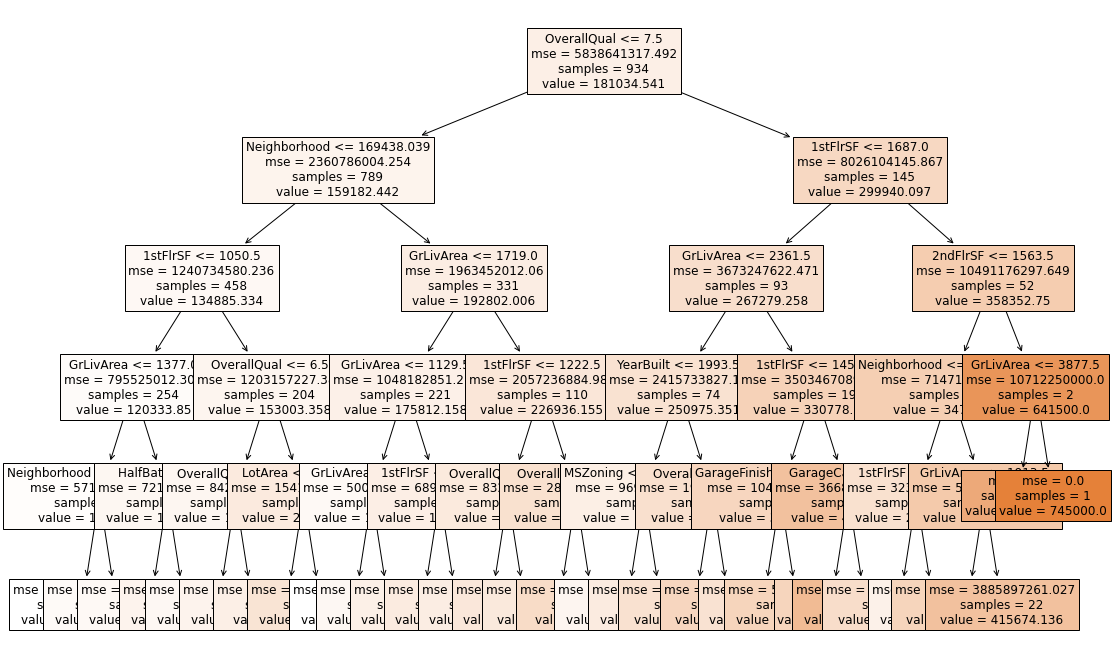

In [25]:
plt.figure(figsize = (18, 12))
#target encoder gives higher score:
plot_tree(pipe1[1], fontsize = 12, filled = True, feature_names = pipe1[0].transform(X_train).columns);

In [26]:
px.histogram(y)

In [27]:
px.histogram(np.log(y))

In [28]:
get_val_score(X_train, np.log(y_train), pipe2)#no improvement

0.6785286420866394

In [29]:
max_depth = [3, 4, 5, 6, 7]
max_features = [0.2, 0.4, 0.6, 0.8, 1]
min_samples_leaf = [5, 10, 20, 30, 40]
cv_scores = []

for depth in max_depth:
    for feature in max_features:
        for sample in min_samples_leaf:
            print(f"Getting validation score for: depth: {depth}, max_features: {feature}, leaf_samples: {sample}")
            pipe1[-1].set_params(max_depth = depth, max_features = feature, min_samples_leaf = sample)
            val_score = get_val_score(X_train, y_train, pipe1)
            cv_scores.append((val_score, depth, feature, sample))

Getting validation score for: depth: 3, max_features: 0.2, leaf_samples: 5
Getting validation score for: depth: 3, max_features: 0.2, leaf_samples: 10
Getting validation score for: depth: 3, max_features: 0.2, leaf_samples: 20
Getting validation score for: depth: 3, max_features: 0.2, leaf_samples: 30
Getting validation score for: depth: 3, max_features: 0.2, leaf_samples: 40
Getting validation score for: depth: 3, max_features: 0.4, leaf_samples: 5
Getting validation score for: depth: 3, max_features: 0.4, leaf_samples: 10
Getting validation score for: depth: 3, max_features: 0.4, leaf_samples: 20
Getting validation score for: depth: 3, max_features: 0.4, leaf_samples: 30
Getting validation score for: depth: 3, max_features: 0.4, leaf_samples: 40
Getting validation score for: depth: 3, max_features: 0.6, leaf_samples: 5
Getting validation score for: depth: 3, max_features: 0.6, leaf_samples: 10
Getting validation score for: depth: 3, max_features: 0.6, leaf_samples: 20
Getting validat

Getting validation score for: depth: 7, max_features: 0.4, leaf_samples: 40
Getting validation score for: depth: 7, max_features: 0.6, leaf_samples: 5
Getting validation score for: depth: 7, max_features: 0.6, leaf_samples: 10
Getting validation score for: depth: 7, max_features: 0.6, leaf_samples: 20
Getting validation score for: depth: 7, max_features: 0.6, leaf_samples: 30
Getting validation score for: depth: 7, max_features: 0.6, leaf_samples: 40
Getting validation score for: depth: 7, max_features: 0.8, leaf_samples: 5
Getting validation score for: depth: 7, max_features: 0.8, leaf_samples: 10
Getting validation score for: depth: 7, max_features: 0.8, leaf_samples: 20
Getting validation score for: depth: 7, max_features: 0.8, leaf_samples: 30
Getting validation score for: depth: 7, max_features: 0.8, leaf_samples: 40
Getting validation score for: depth: 7, max_features: 1, leaf_samples: 5
Getting validation score for: depth: 7, max_features: 1, leaf_samples: 10
Getting validation 

In [30]:
max(cv_scores)

(0.8153516456083153, 6, 0.8, 10)

In [31]:
pipe1[-1].set_params(max_depth = 6, max_features = 0.8, min_samples_leaf = 10)

DecisionTreeRegressor(max_depth=6, max_features=0.8, min_samples_leaf=10)

In [32]:
get_val_score(X, y, pipe1)

0.8164491254271845

In [33]:
pipe = make_pipeline(
        ce.OneHotEncoder(use_cat_names=True),
        GradientBoostingRegressor()
    )
X_train = pipe[0].fit_transform(X_train, y_train)
pipe[1].fit(X_train, y_train)

GradientBoostingRegressor()

In [34]:
from sklearn.inspection import plot_partial_dependence

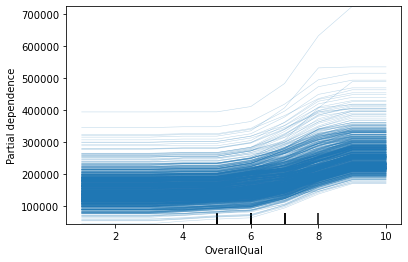

In [35]:
plot_partial_dependence(pipe[1], X_train, ['OverallQual'], kind='individual')

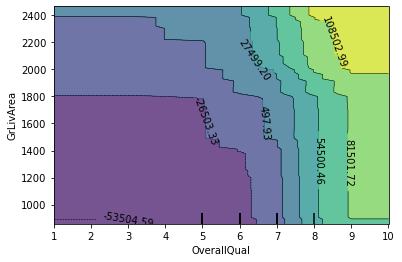

In [38]:
plot_partial_dependence(pipe[1], X_train, [('OverallQual', 'GrLivArea')])

In [47]:
Neighborhood_cols = [col for col in X_train.columns if 'Neighborhood' in col]
Neighborhood_cols




['Neighborhood_NAmes',
 'Neighborhood_Gilbert',
 'Neighborhood_Edwards',
 'Neighborhood_SWISU',
 'Neighborhood_CollgCr',
 'Neighborhood_IDOTRR',
 'Neighborhood_NWAmes',
 'Neighborhood_Somerst',
 'Neighborhood_Sawyer',
 'Neighborhood_Crawfor',
 'Neighborhood_OldTown',
 'Neighborhood_Timber',
 'Neighborhood_BrkSide',
 'Neighborhood_SawyerW',
 'Neighborhood_NridgHt',
 'Neighborhood_Mitchel',
 'Neighborhood_NoRidge',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Neighborhood_ClearCr',
 'Neighborhood_StoneBr',
 'Neighborhood_MeadowV',
 'Neighborhood_Blueste']

In [60]:
pipe = make_pipeline(ce.TargetEncoder())
mod = GradientBoostingRegressor()
X_train = pipe.fit_transform(X_train, y_train)
mod.fit(X_train, y_train)

GradientBoostingRegressor()

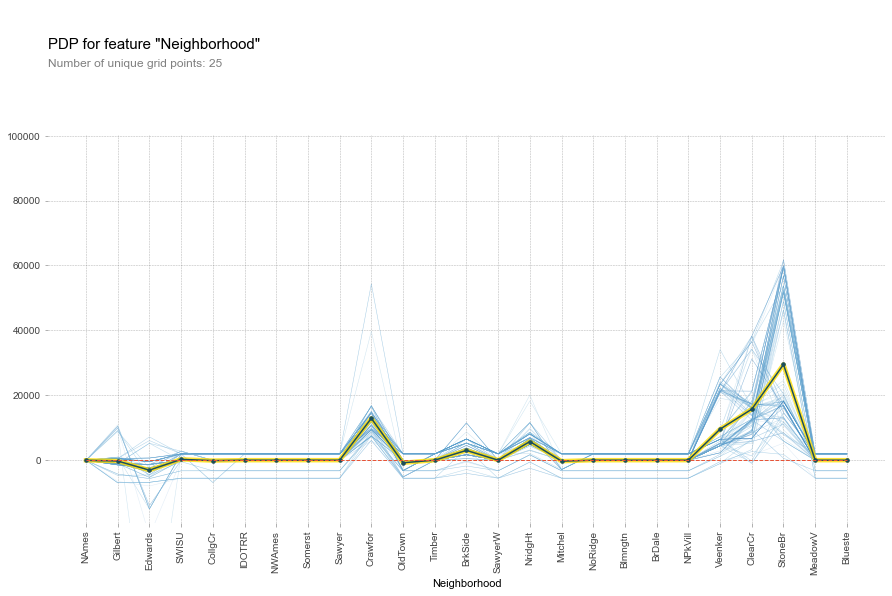

In [61]:
pdp_Neighborhood = pdp.pdp_isolate(
    # dataset -- create the final transformation of our data
    model=mod, dataset=X_train, model_features=X_train.columns, 
    # this is the list of all the columns for the genre feature
    feature=Neighborhood_cols
)

fig, axes = pdp.pdp_plot(pdp_Neighborhood, 'Neighborhood', plot_lines=True, frac_to_plot=100)
# this code is just for formatting -- getting the labels to format correctly
xtick_labels = [Neighborhood.split('_')[1] for Neighborhood in Neighborhood_cols]
axes['pdp_ax'].set_xticklabels(xtick_labels, rotation='vertical');

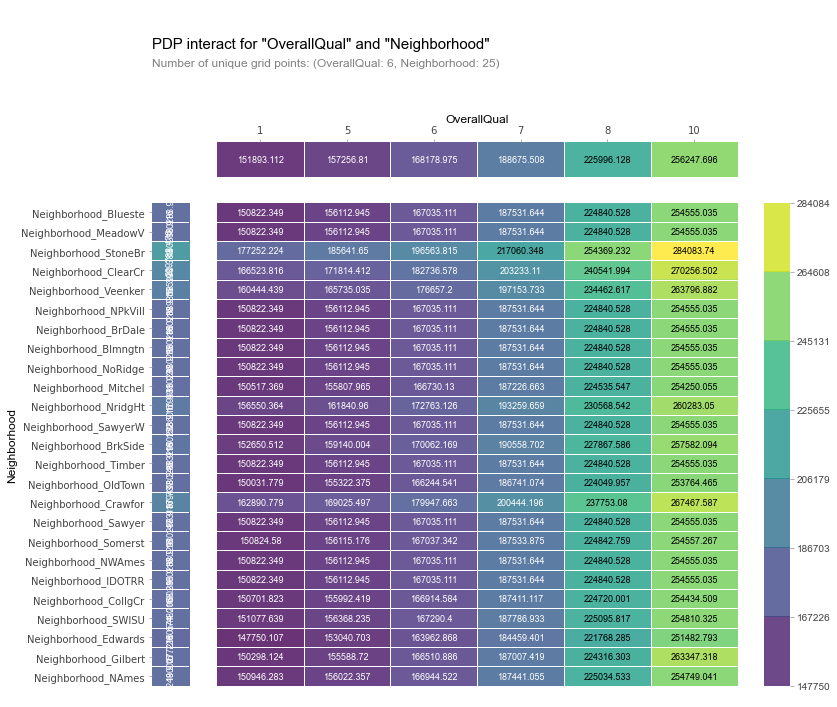

In [62]:
# and a slightly different look at the same problem
gbm_inter = pdp.pdp_interact(
    model=mod, dataset=X_train, model_features=X_train.columns, 
    features=['OverallQual', Neighborhood_cols]
)


fig, axes = pdp.pdp_interact_plot(
    gbm_inter, ['OverallQual', 'Neighborhood'], x_quantile=True, plot_type='grid', plot_pdp=True
)

# this part is just for formatting
axes['pdp_inter_ax']['_pdp_inter_ax'];